In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For association rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# For classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Make plots look nice in notebook
%matplotlib inline

# Path to the CSV
file_path = "Supermart_Grocery_Sales.csv"

# Read CSV
df = pd.read_csv(file_path)

In [2]:
# Q1: Load the Dataset and print first 10 rows
display(df.head(10))

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.0,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.0,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.0,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305.0,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826.0,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,NaN,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795.0,0.27,484.65,Tamil Nadu


In [3]:
# Q2: Print that data whose profit is higher than 150 (>=150)
# and display Customer, Category, Sales, Discount columns only.
print("Q2: Records with Profit >= 150")
q2 = df[df['Profit'] >= 150][['Customer Name', 'Category', 'Sales', 'Discount']]
q2


Q2: Records with Profit >= 150


,Customer Name,Category,Sales,Discount
0,Harish,Oil & Masala,1254.0,0.12
2,Hussain,Food Grains,2360.0,0.21
4,Ridhesh,Food Grains,2355.0,0.26
5,Adavan,Food Grains,2305.0,0.26
6,Jonas,Fruits & Veggies,826.0,0.33
...,...,...,...,...
9988,Jackson,Snacks,1460.0,0.15
9989,Sudeep,"Eggs, Meat & Fish",945.0,0.16
9991,Ravi,Food Grains,1567.0,0.16
9992,Peer,Oil & Masala,1659.0,0.15


In [4]:
# Q3: Data cleaning
# a) Fill null values of Sales column using Average (mean) method.
# b) Fill null values of Discount column using Backward Fill method (bfill).
# c) Fill null values of Profit column using Forward Fill method (ffill).

# a
sales_mean = df['Sales'].mean()
df['Sales'].fillna(sales_mean)

# b
df['Discount'].ffill()

# c
df['Profit'].ffill()


# Show first 10 rows of these columns to confirm
df[['Sales', 'Discount', 'Profit']].head(10)

,Sales,Discount,Profit
0,1254.0,0.12,401.28
1,749.0,0.18,149.80
2,2360.0,0.21,165.20
3,896.0,0.25,89.60
4,2355.0,0.26,918.45
5,2305.0,0.26,322.70
6,826.0,0.33,346.92
7,NaN,0.32,147.76
8,791.0,0.23,181.93
9,1795.0,0.27,484.65


In [5]:
# Q4: Make a new column Sales_Norm and apply Min-Max Normalization on Sales column
df['Sales_Norm'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())

print("Q4: first 10 rows of Sales and Sales_Norm")
df[['Sales', 'Sales_Norm']].head(10)

Q4: first 10 rows of Sales and Sales_Norm


,Sales,Sales_Norm
0,1254.0,0.3770
1,749.0,0.1245
2,2360.0,0.9300
3,896.0,0.1980
4,2355.0,0.9275
5,2305.0,0.9025
6,826.0,0.1630
7,NaN,NaN
8,791.0,0.1455
9,1795.0,0.6475


Q5: Preparing transactions grouped by 'Customer Name'
Number of transactions (unique Customer Name): 50
Frequent itemsets (support >= 0.02):


,support,itemsets
0,0.32,frozenset({Soft Drinks})
1,0.26,frozenset({Health Drinks})
2,0.22,frozenset({Atta & Flour})
3,0.20,frozenset({Chocolates})
4,0.20,frozenset({Noodles})
...,...,...
679,0.02,"frozenset({Mutton, Masalas, Noodles, Soft Drin..."
680,0.02,"frozenset({Noodles, Organic Vegetables, Fresh ..."
681,0.02,"frozenset({Mutton, Rice, Fish, Fresh Fruits, E..."
682,0.02,"frozenset({Health Drinks, Edible Oil & Ghee, D..."


Association rules with confidence >= 0.5:


,antecedents,consequents,support,confidence,lift
0,"frozenset({Chocolates, Mutton})",frozenset({Atta & Flour}),0.04,1.0,4.545455
1,"frozenset({Fresh Vegetables, Cookies})",frozenset({Atta & Flour}),0.04,1.0,4.545455
2,"frozenset({Atta & Flour, Organic Fruits})",frozenset({Cookies}),0.04,1.0,5.000000
3,"frozenset({Edible Oil & Ghee, Atta & Flour})",frozenset({Soft Drinks}),0.04,1.0,3.125000
4,"frozenset({Biscuits, Organic Fruits})",frozenset({Dals & Pulses}),0.04,1.0,6.250000
...,...,...,...,...,...
3868,"frozenset({Fish, Mutton})","frozenset({Rice, Fresh Fruits, Chicken, Eggs, ...",0.02,0.5,25.000000
3869,"frozenset({Cookies, Rice})","frozenset({Mutton, Fish, Fresh Fruits, Chicken...",0.02,0.5,25.000000
3870,"frozenset({Fish, Fresh Fruits})","frozenset({Mutton, Rice, Chicken, Eggs, Cookies})",0.02,0.5,25.000000
3871,"frozenset({Fresh Fruits, Cookies})","frozenset({Mutton, Rice, Fish, Chicken, Eggs})",0.02,0.5,25.000000


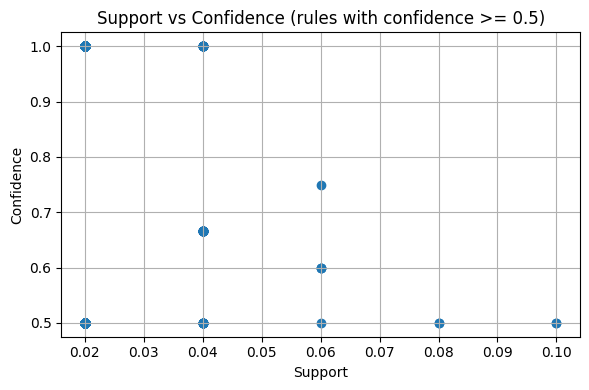

In [6]:
# Q5: Convert dataset into transaction format by grouping products by Order ID,
# then apply Apriori (min_support=0.02) and generate association rules with confidence >= 0.5
print("Q5: Preparing transactions grouped by 'Customer Name'")
df

customer_col = 'Customer Name'
product_col = 'Sub Category'

transactions = df.head(200).groupby(customer_col)[product_col].apply(list).tolist()
print(f"Number of transactions (unique {customer_col}): {len(transactions)}")

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
trans_df = pd.DataFrame(te_ary, columns=te.columns_)

# Frequent itemsets with min_support=0.02
freq_itemsets = apriori(trans_df, min_support=0.02, use_colnames=True)
print("Frequent itemsets (support >= 0.02):")
display(freq_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True))

# Generate rules and filter confidence >= 0.5
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.5)
rules_filtered = rules[rules['confidence'] >= 0.5].sort_values(by=['confidence','support'], ascending=False)
print("Association rules with confidence >= 0.5:")
display(rules_filtered[['antecedents','consequents','support','confidence','lift']].reset_index(drop=True))


# Scatter plot support vs confidence
plt.figure(figsize=(6,4))
plt.scatter(rules_filtered['support'], rules_filtered['confidence'])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (rules with confidence >= 0.5)")
plt.grid(True)
plt.tight_layout()
plt.show()

Q6: Naive Bayes classification using Sales, Discount, Profit
Median Profit: 320.66999999999996
Accuracy: 0.9567
Confusion Matrix (rows = true class, columns = predicted class):
[[1415   84]
 [  46 1454]]


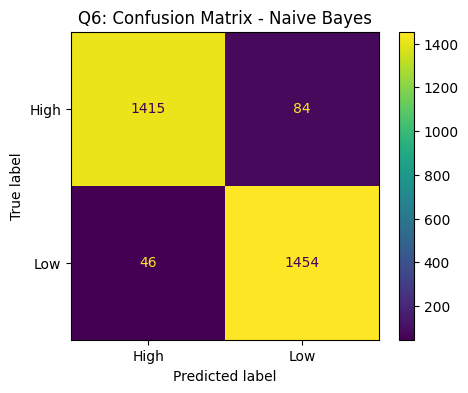

In [7]:
# Q6: Create Profit_Category by classifying Profit into "High" and "Low" based on median value.
# Select features Sales, Discount, Quantity. Train/test split. Naive Bayes classifier.
print("Q6: Naive Bayes classification using Sales, Discount, Profit")

# Ensure 'Quantity' column exists; if named differently, replace below
features = ['Sales', 'Discount', 'Profit']

# Create Profit_Category
median_profit = df['Profit'].median()
df['Profit_Category'] = np.where(df['Profit'] >= median_profit, 'High', 'Low')

# Prepare X, y
X = df[features].copy()
y = df['Profit_Category'].copy()

# If there are missing values in features after cleaning, handle (here we forward-fill as safe-guard)
X.ffill(inplace=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Median Profit: {median_profit}")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix (rows = true class, columns = predicted class):")
print(cm)

# Display confusion matrix nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax)
plt.title("Q6: Confusion Matrix - Naive Bayes")
plt.show()